In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Read in training data

In [3]:
TRAINING_DATASET = "tap_fun_train.csv"

In [7]:
training_df = pd.read_csv("./data/" + TRAINING_DATASET)

In [9]:
training_df.columns.values

array(['user_id', 'register_time', 'wood_add_value', 'wood_reduce_value',
       'stone_add_value', 'stone_reduce_value', 'ivory_add_value',
       'ivory_reduce_value', 'meat_add_value', 'meat_reduce_value',
       'magic_add_value', 'magic_reduce_value', 'infantry_add_value',
       'infantry_reduce_value', 'cavalry_add_value',
       'cavalry_reduce_value', 'shaman_add_value', 'shaman_reduce_value',
       'wound_infantry_add_value', 'wound_infantry_reduce_value',
       'wound_cavalry_add_value', 'wound_cavalry_reduce_value',
       'wound_shaman_add_value', 'wound_shaman_reduce_value',
       'general_acceleration_add_value',
       'general_acceleration_reduce_value',
       'building_acceleration_add_value',
       'building_acceleration_reduce_value',
       'reaserch_acceleration_add_value',
       'reaserch_acceleration_reduce_value',
       'training_acceleration_add_value',
       'training_acceleration_reduce_value',
       'treatment_acceleraion_add_value',
       'treatm

In [10]:
training_df.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


## Check spender vs. non-spender by D45

In [31]:
## Label spender and non-spender
training_df['spender_label'] = training_df.apply(
    lambda row: 'spender' if row['prediction_pay_price'] > 0 else 'non-spender',
    axis=1
)

In [33]:
training_df.groupby('spender_label')['user_id'].agg('count')

spender_label
non-spender    2242019
spender          45988
Name: user_id, dtype: int64

## Plot histogram of spenders (for a specific spending range)

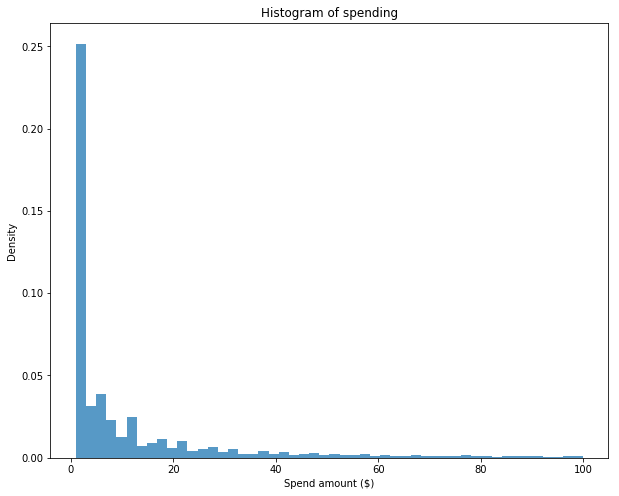

In [38]:
spend_lower = 0
spend_upper = 100

plt.figure(figsize=(10,8))

n, bins, patches = plt.hist(training_df[(training_df['prediction_pay_price'] > spend_lower) 
                                        & (training_df['prediction_pay_price'] <= spend_upper)].prediction_pay_price, 
                            50, density=True, alpha=0.75)

plt.xlabel('Spend amount ($)')
plt.ylabel('Density')
plt.title('Histogram of spending')
plt.show()